In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist


In [5]:
(x_train,y_train1),(x_test,y_test1) = fashion_mnist.load_data()

In [6]:
(x_train,y_train1),(x_test,y_test1) = (x_train/255,y_train1),(x_test/255,y_test1)

In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train1.reshape(-1,1)).toarray()
y_test = encoder.fit_transform(y_test1.reshape(-1,1)).toarray()

/home/deadlock20000/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/deadlock20000/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories

In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

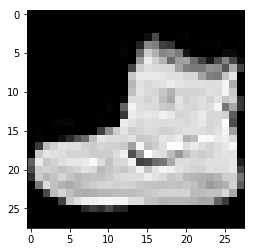

In [9]:
plt.imshow(x_train[0],cmap="gray")

In [10]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [11]:
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(output_dim=32,activation="relu"))
model.add(Dense(output_dim=10,activation="sigmoid"))

/home/deadlock20000/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  import sys
/home/deadlock20000/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [13]:
model.compile(optimizer=Adam(),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total para

In [21]:
history = model.fit(x_train,y_train1,batch_size=10,epochs=10,verbose=1,validation_data=(x_test,y_test1))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 54s 907us/step - loss: 0.2573 - acc: 0.9051 - val_loss: 0.3205 - val_acc: 0.8805
Epoch 2/10
60000/60000 [==============================] - 54s 900us/step - loss: 0.2388 - acc: 0.9119 - val_loss: 0.2845 - val_acc: 0.8972
Epoch 3/10
60000/60000 [==============================] - 54s 905us/step - loss: 0.2236 - acc: 0.9163 - val_loss: 0.2919 - val_acc: 0.8963
Epoch 4/10
60000/60000 [==============================] - 54s 905us/step - loss: 0.2124 - acc: 0.9215 - val_loss: 0.2887 - val_acc: 0.8958
Epoch 5/10
60000/60000 [==============================] - 54s 905us/step - loss: 0.1999 - acc: 0.9252 - val_loss: 0.2796 - val_acc: 0.8989
Epoch 6/10
60000/60000 [==============================] - 54s 906us/step - loss: 0.1902 - acc: 0.9276 - val_loss: 0.2775 - val_acc: 0.9034
Epoch 7/10
60000/60000 [==============================] - 54s 906us/step - loss: 0.1804 - acc: 0.9315 - val_loss: 0.

In [23]:
history.history

{'val_loss': [0.32045798606122844,
  0.2845349795166403,
  0.29187036770628766,
  0.28866838437214026,
  0.2796270153090882,
  0.2774809647823859,
  0.27845172415609704,
  0.2939562649975342,
  0.30516837869223673,
  0.3188787709937933],
 'val_acc': [0.88049999371171,
  0.8971999935507774,
  0.8962999927401543,
  0.8957999931573868,
  0.8988999931812286,
  0.9033999926447869,
  0.9036999922990799,
  0.9036999922990799,
  0.9006999933123588,
  0.8991999931335449],
 'loss': [0.2572535065189198,
  0.2388181770851176,
  0.22356750278228718,
  0.21237745292143761,
  0.1999406623279865,
  0.19015058566699494,
  0.18043672415861148,
  0.17307351679268324,
  0.1672897689182355,
  0.16020481937189227],
 'acc': [0.9050666595846415,
  0.9118833260635535,
  0.9162999926110109,
  0.9215333259999752,
  0.9251999925523996,
  0.9275999924093485,
  0.9315333260893822,
  0.9348666595717271,
  0.9374499926666419,
  0.9387499926388264]}

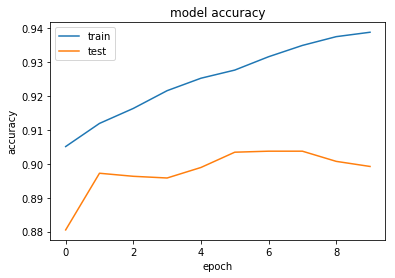

In [30]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"])

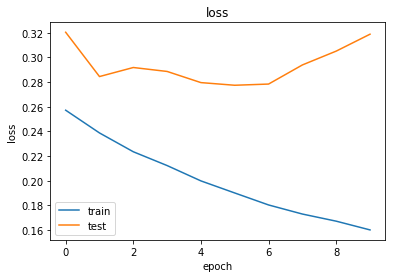

In [31]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","test"])